In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
file_log = "App/obj/Release/stats_log.csv"
logs = pd.read_csv(file_log, sep = ";",  decimal=',')

In [3]:
set(logs.DataType)

{'cntCurInfected',
 'cntDeletedViruses',
 'cntInfected',
 'cntLivingViruses',
 'cntNonInfected'}

In [4]:
file_log = "App/obj/Release/stats.csv"
logs_main = pd.read_csv(file_log, sep = ";",  decimal=',' )

In [5]:
logs_main["deseasDurationByOne"] = logs_main.durationOfDesease / logs_main.NmbOfInhabitants

In [6]:
logs_main.columns

Index([u'timeStamp', u' elapsed time', u'width', u'height', u'rateInh', u'rateVir', u'iterations', u'cognitive', u'lifetimeVir', u'NmbOfInhabitants', u'durationOfDesease', u'nmbOfRelocationInfected', u'nmbOfRelocationNonInfected', u'nmbOfConflictsII', u'nmbOfConflictsINI', u'nmbOfConflictsININ', u'recoveryRate / cnt', u'nmbOfViruses', u'avgProbabilityOfInfection', u'deseasDurationByOne'], dtype='object')

In [7]:
merged_logs = pd.concat([logs_main, logs], axis=1, join='inner')
merged_logs.columns

Index([u'timeStamp', u' elapsed time', u'width', u'height', u'rateInh', u'rateVir', u'iterations', u'cognitive', u'lifetimeVir', u'NmbOfInhabitants', u'durationOfDesease', u'nmbOfRelocationInfected', u'nmbOfRelocationNonInfected', u'nmbOfConflictsII', u'nmbOfConflictsINI', u'nmbOfConflictsININ', u'recoveryRate / cnt', u'nmbOfViruses', u'avgProbabilityOfInfection', u'deseasDurationByOne', u'Stamp', u'DataType', u'1', u'2', u'3', u'4', u'5', u'6', u'7', u'8', u'9', u'10', u'11', u'12', u'13', u'14', u'15', u'16', u'17', u'18', u'19', u'20', u'21', u'22', u'23', u'24', u'25', u'26', u'27', u'28', u'29', u'30', u'31', u'32', u'33', u'34', u'35', u'36', u'37', u'38', u'39', u'40', u'41', u'42', u'43', u'44', u'45', u'46', u'47', u'48', u'49', u'50', u'51', u'52', u'53', u'54', u'55', u'56', u'57', u'58', u'59', u'60', u'61', u'62', u'63', u'64', u'65', u'66', u'67', u'68', u'69', u'70', u'71', u'72', u'73', u'74', u'75', u'76', u'77', u'78', ...], dtype='object')

In [8]:
logs_main.columns

Index([u'timeStamp', u' elapsed time', u'width', u'height', u'rateInh', u'rateVir', u'iterations', u'cognitive', u'lifetimeVir', u'NmbOfInhabitants', u'durationOfDesease', u'nmbOfRelocationInfected', u'nmbOfRelocationNonInfected', u'nmbOfConflictsII', u'nmbOfConflictsINI', u'nmbOfConflictsININ', u'recoveryRate / cnt', u'nmbOfViruses', u'avgProbabilityOfInfection', u'deseasDurationByOne'], dtype='object')

In [10]:
def the_same(r1, r2):
    return (r1.width == r2.width) and (r1.height == r2.height) and (r1.rateInh == r2.rateInh) and (r1.rateVir == r2.rateVir) and (r1.iterations == r2.iterations) and (r1.cognitive == r2.cognitive) and (r1['recoveryRate / cnt'] == r2['recoveryRate / cnt']) and (r1[u'avgProbabilityOfInfection'] == r2[u'avgProbabilityOfInfection']) and (r1.lifetimeVir == r2.lifetimeVir)

In [11]:
def group_by_columns(df, columns_list):
    return df.groupby(by = columns_list).mean().reset_index()

In [12]:
df_main = logs_main[[u'width', u'height', u'rateInh', u'rateVir', u'iterations', u'cognitive',u'recoveryRate / cnt', u'avgProbabilityOfInfection', u'NmbOfInhabitants', u'lifetimeVir']]
different_parameters = df_main.drop_duplicates()
different_parameters.reset_index(inplace = True)
par_number =  different_parameters.shape[0]
rows_number = df_main.shape[0]
data_stamp = {}
for par_i in xrange(par_number):
    data_stamp[par_i] = []
    par_row = different_parameters.irow(par_i)
    for i in xrange(rows_number):
        i_row = logs_main.irow(i)
        #print i_row, par_row
        if the_same(i_row,par_row):
            data_stamp[par_i].append(i_row.timeStamp)

In [13]:
different_parameters

,index,width,height,rateInh,rateVir,iterations,cognitive,recoveryRate / cnt,avgProbabilityOfInfection,NmbOfInhabitants,lifetimeVir
0,0,10,10,0.1,0.05,100,False,0.2,0.2,10,1
1,100,10,10,0.1,0.05,100,True,0.2,0.2,10,1
2,200,10,10,0.1,0.10,100,False,0.2,0.2,10,1
3,300,10,10,0.1,0.10,100,True,0.2,0.2,10,1
4,400,10,10,0.2,0.10,100,False,0.2,0.2,20,1
5,500,10,10,0.2,0.10,100,True,0.2,0.2,20,1
6,600,10,10,0.2,0.20,100,False,0.2,0.2,20,1
7,700,10,10,0.2,0.20,100,True,0.2,0.2,20,1
8,900,10,10,0.2,0.10,100,False,0.2,0.8,20,1
9,1000,10,10,0.2,0.10,100,True,0.2,0.8,20,1


In [14]:
different_parameters.columns

Index([u'index', u'width', u'height', u'rateInh', u'rateVir', u'iterations', u'cognitive', u'recoveryRate / cnt', u'avgProbabilityOfInfection', u'NmbOfInhabitants', u'lifetimeVir'], dtype='object')

In [14]:
#vals = agg_df[agg_df.DataType == "cntInfected"].values[0][2:]
#y = vals.astype(float)
#x = np.array(range(y.shape[0]))
def get_approx(vals):
    y = vals.astype(float)
    x = np.array(range(y.shape[0]))
    return np.poly1d(np.polyfit(x, y, 5))

14     index  width  height  rateInh  rateVir  iterations cognitive  \
14   1500     10      10      0.1     0.05         100     False   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
14                 0.2                        0.2                10   

    lifetimeVir  
14          101  


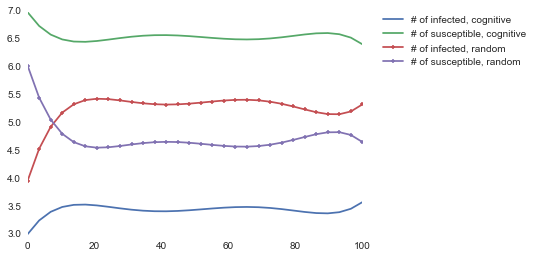

17     index  width  height  rateInh  rateVir  iterations cognitive  \
17   1800     10      10      0.2      0.1         100     False   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
17                 0.2                        0.2                20   

    lifetimeVir  
17          101  


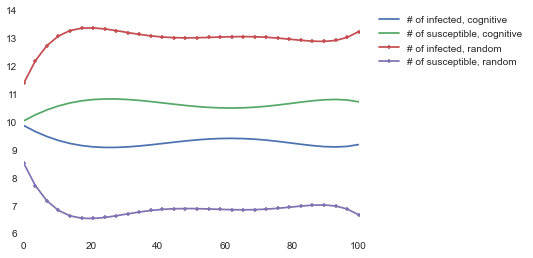

19     index  width  height  rateInh  rateVir  iterations cognitive  \
19   2000     10      10      0.2      0.2         100     False   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
19                 0.2                        0.2                20   

    lifetimeVir  
19          101  


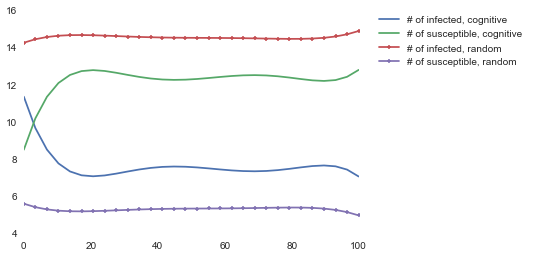

In [15]:
lst = [[14, 15], [17, 18], [19, 20]]
for l in lst: 
    print l[0], different_parameters[l[0]:l[0]+1]
    
    criterion = logs.Stamp.map(lambda x: x in data_stamp[l[1]])
    df_logs_same_parameters = logs[criterion]
    agg_df = df_logs_same_parameters.groupby(by = "DataType").mean().reset_index()
    val_inf = agg_df[agg_df.DataType == "cntInfected"].values[0][2:]
    val_non_inf = agg_df[agg_df.DataType == "cntNonInfected"].values[0][2:]
    xp = np.linspace(0, val_inf.shape[0], 30)  
    p5_inf_cog = get_approx(val_inf)
    p5_non_inf_cog =  get_approx(val_non_inf)
    plt.plot( xp, p5_inf_cog(xp), '-',label = "# of infected, cognitive")
    plt.plot( xp, p5_non_inf_cog(xp), '-',label = "# of susceptible, cognitive")
    
    criterion = logs.Stamp.map(lambda x: x in data_stamp[l[0]])
    df_logs_same_parameters = logs[criterion]
    agg_df = df_logs_same_parameters.groupby(by = "DataType").mean().reset_index()
    val_inf_rand = agg_df[agg_df.DataType == "cntInfected"].values[0][2:]
    val_non_inf_rand = agg_df[agg_df.DataType == "cntNonInfected"].values[0][2:]
    p5_inf_rand = get_approx(val_inf_rand)
    p5_non_inf_rand =  get_approx(val_non_inf_rand)
    plt.plot( xp, p5_inf_rand(xp), '.-',label = "# of infected, random")
    plt.plot( xp, p5_non_inf_rand(xp), '.-',label = "# of susceptible, random")
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    #plt.savefig("inh_" + str(l[0]) + str(l[1]) + ".png", figsize=(8, 6), dpi=80 )

21     index  width  height  rateInh  rateVir  iterations cognitive  \
21   2200     10      10      0.2      0.1         100     False   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
21                 0.2                        0.8                20   

    lifetimeVir  
21          101  


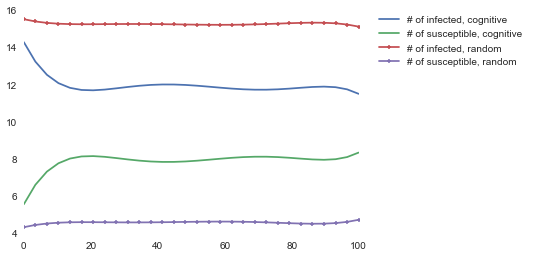

23     index  width  height  rateInh  rateVir  iterations cognitive  \
23   2400     10      10      0.2      0.1         100     False   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
23                 0.8                        0.8                20   

    lifetimeVir  
23          101  


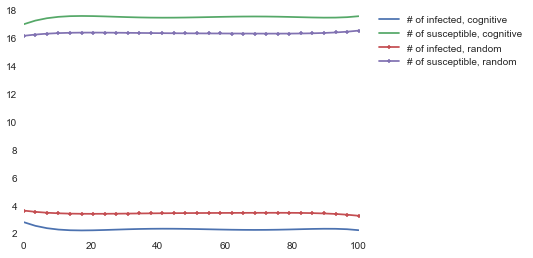

25     index  width  height  rateInh  rateVir  iterations cognitive  \
25   2600     10      10      0.2      0.1         100     False   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
25                 0.8                        0.2                20   

    lifetimeVir  
25          101  


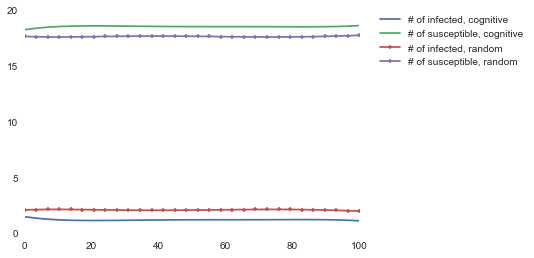

28     index  width  height  rateInh  rateVir  iterations cognitive  \
28   3000     10      10      0.1      0.1         100      True   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
28                 0.2                        0.2                10   

    lifetimeVir  
28          101  


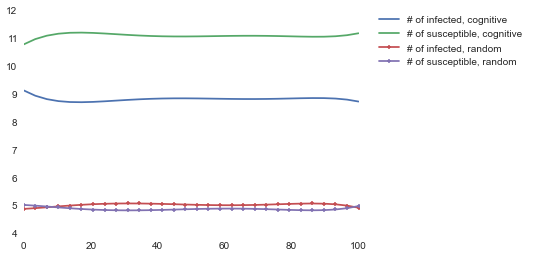

In [19]:
lst = [[21,22] , [23,24], [25, 26],[28, 29]] #[33,28]]
for l in lst: 
    print l[0], different_parameters[l[0]:l[0]+1]
    
    criterion = logs.Stamp.map(lambda x: x in data_stamp[l[1]])
    df_logs_same_parameters = logs[criterion]
    agg_df = df_logs_same_parameters.groupby(by = "DataType").mean().reset_index()
    val_inf = agg_df[agg_df.DataType == "cntInfected"].values[0][2:]
    val_non_inf = agg_df[agg_df.DataType == "cntNonInfected"].values[0][2:]
    xp = np.linspace(0, val_inf.shape[0], 30)  
    p5_inf_cog = get_approx(val_inf)
    p5_non_inf_cog =  get_approx(val_non_inf)
    plt.plot( xp, p5_inf_cog(xp), '-',label = "# of infected, cognitive")
    plt.plot( xp, p5_non_inf_cog(xp), '-',label = "# of susceptible, cognitive")
    
    criterion = logs.Stamp.map(lambda x: x in data_stamp[l[0]])
    df_logs_same_parameters = logs[criterion]
    agg_df = df_logs_same_parameters.groupby(by = "DataType").mean().reset_index()
    val_inf_rand = agg_df[agg_df.DataType == "cntInfected"].values[0][2:]
    val_non_inf_rand = agg_df[agg_df.DataType == "cntNonInfected"].values[0][2:]
    p5_inf_rand = get_approx(val_inf_rand)
    p5_non_inf_rand =  get_approx(val_non_inf_rand)
    plt.plot( xp, p5_inf_rand(xp), '.-',label = "# of infected, random")
    plt.plot( xp, p5_non_inf_rand(xp), '.-',label = "# of susceptible, random")
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

key =  0
   index  width  height  rateInh  rateVir  iterations cognitive  \
0      0     10      10      0.1     0.05         100     False   

   recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
0                 0.2                        0.2                10   

   lifetimeVir  
0            1  


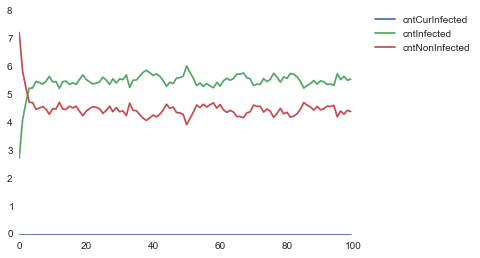

key =  1
   index  width  height  rateInh  rateVir  iterations cognitive  \
1    100     10      10      0.1     0.05         100      True   

   recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
1                 0.2                        0.2                10   

   lifetimeVir  
1            1  


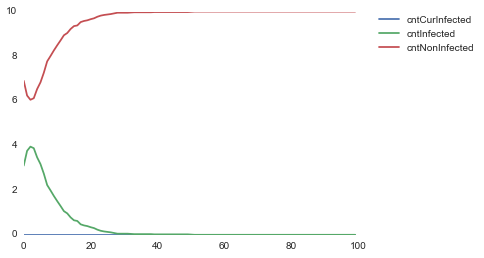

key =  2
   index  width  height  rateInh  rateVir  iterations cognitive  \
2    200     10      10      0.1      0.1         100     False   

   recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
2                 0.2                        0.2                10   

   lifetimeVir  
2            1  


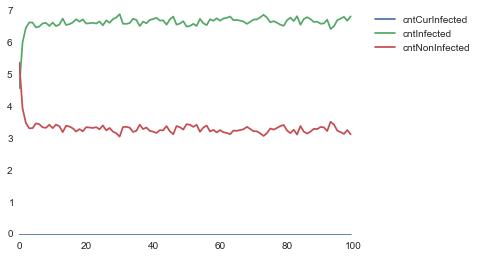

key =  3
   index  width  height  rateInh  rateVir  iterations cognitive  \
3    300     10      10      0.1      0.1         100      True   

   recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
3                 0.2                        0.2                10   

   lifetimeVir  
3            1  


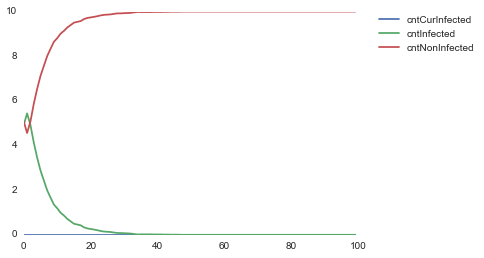

key =  4
   index  width  height  rateInh  rateVir  iterations cognitive  \
4    400     10      10      0.2      0.1         100     False   

   recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
4                 0.2                        0.2                20   

   lifetimeVir  
4            1  


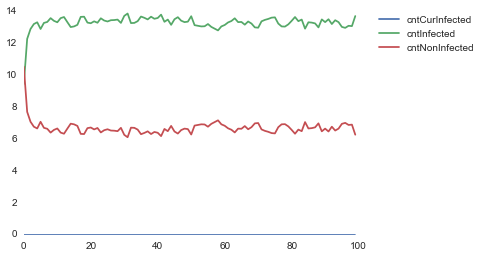

key =  5
   index  width  height  rateInh  rateVir  iterations cognitive  \
5    500     10      10      0.2      0.1         100      True   

   recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
5                 0.2                        0.2                20   

   lifetimeVir  
5            1  


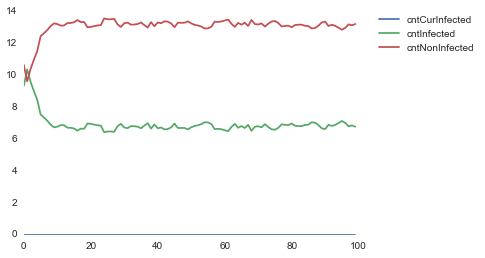

key =  6
   index  width  height  rateInh  rateVir  iterations cognitive  \
6    600     10      10      0.2      0.2         100     False   

   recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
6                 0.2                        0.2                20   

   lifetimeVir  
6            1  


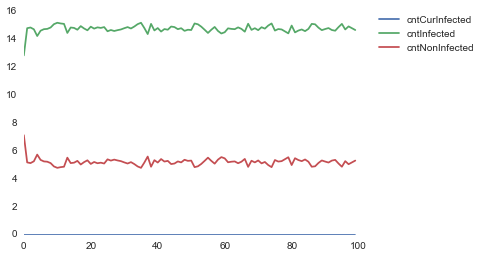

key =  7
   index  width  height  rateInh  rateVir  iterations cognitive  \
7    700     10      10      0.2      0.2         100      True   

   recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
7                 0.2                        0.2                20   

   lifetimeVir  
7            1  


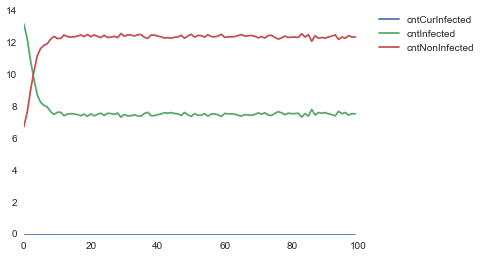

key =  8
   index  width  height  rateInh  rateVir  iterations cognitive  \
8    900     10      10      0.2      0.1         100     False   

   recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
8                 0.2                        0.8                20   

   lifetimeVir  
8            1  


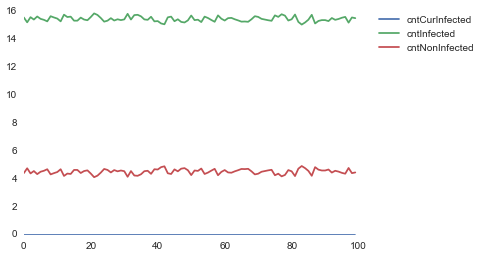

key =  9
   index  width  height  rateInh  rateVir  iterations cognitive  \
9   1000     10      10      0.2      0.1         100      True   

   recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
9                 0.2                        0.8                20   

   lifetimeVir  
9            1  


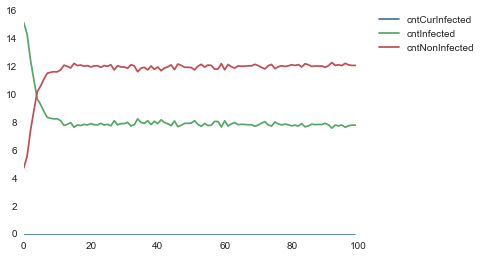

key =  10
    index  width  height  rateInh  rateVir  iterations cognitive  \
10   1100     10      10      0.2      0.1         100     False   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
10                 0.8                        0.8                20   

    lifetimeVir  
10            1  


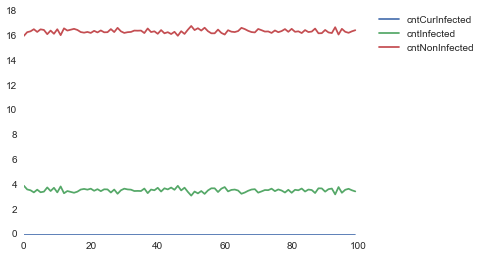

key =  11
    index  width  height  rateInh  rateVir  iterations cognitive  \
11   1200     10      10      0.2      0.1         100      True   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
11                 0.8                        0.8                20   

    lifetimeVir  
11            1  


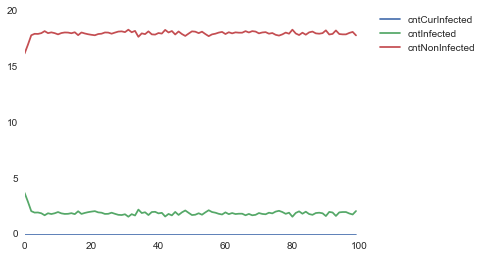

key =  12
    index  width  height  rateInh  rateVir  iterations cognitive  \
12   1300     10      10      0.2      0.1         100     False   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
12                 0.8                        0.2                20   

    lifetimeVir  
12            1  


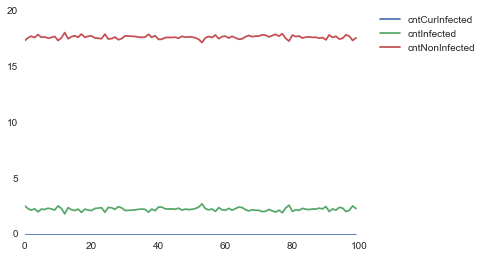

key =  13
    index  width  height  rateInh  rateVir  iterations cognitive  \
13   1400     10      10      0.2      0.1         100      True   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
13                 0.8                        0.2                20   

    lifetimeVir  
13            1  


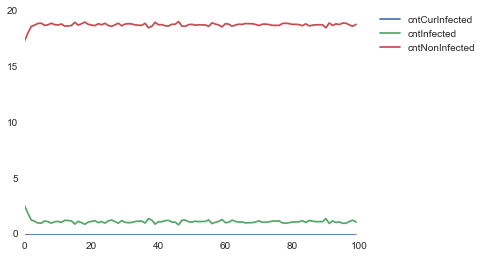

key =  14
    index  width  height  rateInh  rateVir  iterations cognitive  \
14   1500     10      10      0.1     0.05         100     False   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
14                 0.2                        0.2                10   

    lifetimeVir  
14          101  


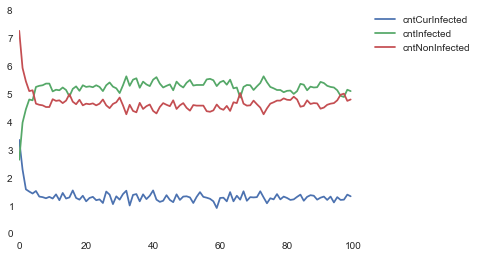

key =  15
    index  width  height  rateInh  rateVir  iterations cognitive  \
15   1600     10      10      0.1     0.05         100      True   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
15                 0.2                        0.2                10   

    lifetimeVir  
15          101  


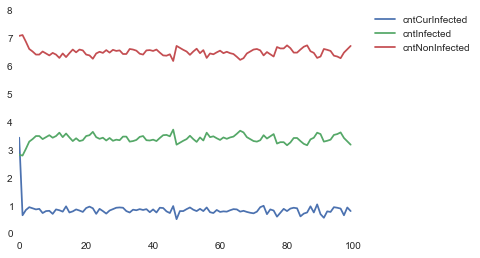

key =  16
    index  width  height  rateInh  rateVir  iterations cognitive  \
16   1700     10      10      0.1      0.1         100     False   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
16                 0.2                        0.2                10   

    lifetimeVir  
16          101  


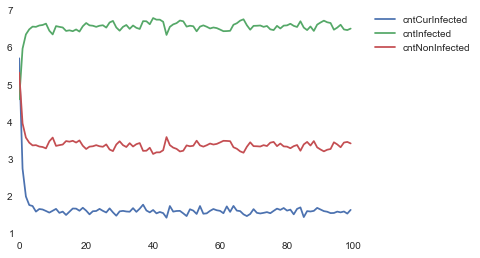

key =  17
    index  width  height  rateInh  rateVir  iterations cognitive  \
17   1800     10      10      0.2      0.1         100     False   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
17                 0.2                        0.2                20   

    lifetimeVir  
17          101  


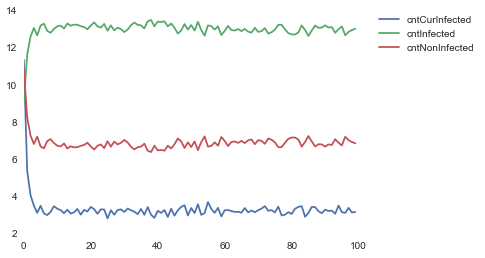

key =  18
    index  width  height  rateInh  rateVir  iterations cognitive  \
18   1900     10      10      0.2      0.1         100      True   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
18                 0.2                        0.2                20   

    lifetimeVir  
18          101  


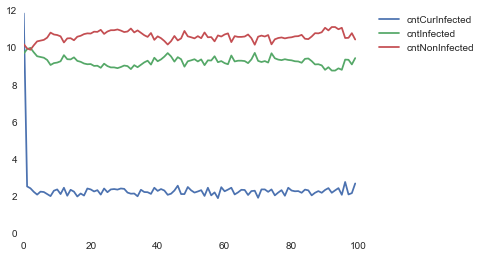

key =  19
    index  width  height  rateInh  rateVir  iterations cognitive  \
19   2000     10      10      0.2      0.2         100     False   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
19                 0.2                        0.2                20   

    lifetimeVir  
19          101  


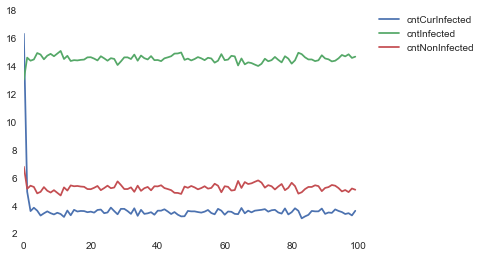

key =  20
    index  width  height  rateInh  rateVir  iterations cognitive  \
20   2100     10      10      0.2      0.2         100      True   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
20                 0.2                        0.2                20   

    lifetimeVir  
20          101  


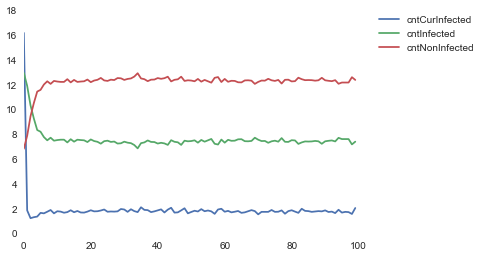

key =  21
    index  width  height  rateInh  rateVir  iterations cognitive  \
21   2200     10      10      0.2      0.1         100     False   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
21                 0.2                        0.8                20   

    lifetimeVir  
21          101  


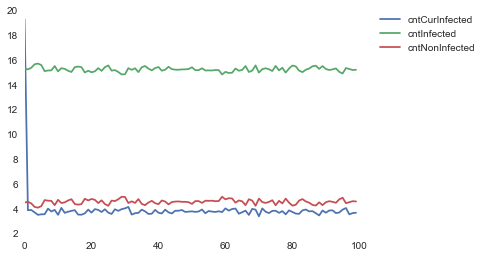

key =  22
    index  width  height  rateInh  rateVir  iterations cognitive  \
22   2300     10      10      0.2      0.1         100      True   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
22                 0.2                        0.8                20   

    lifetimeVir  
22          101  


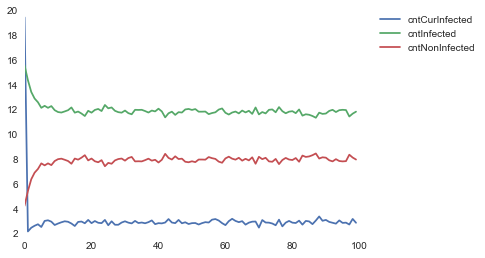

key =  23
    index  width  height  rateInh  rateVir  iterations cognitive  \
23   2400     10      10      0.2      0.1         100     False   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
23                 0.8                        0.8                20   

    lifetimeVir  
23          101  


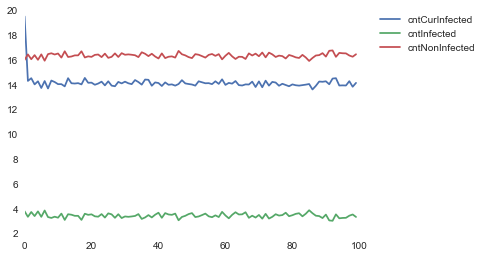

key =  24
    index  width  height  rateInh  rateVir  iterations cognitive  \
24   2500     10      10      0.2      0.1         100      True   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
24                 0.8                        0.8                20   

    lifetimeVir  
24          101  


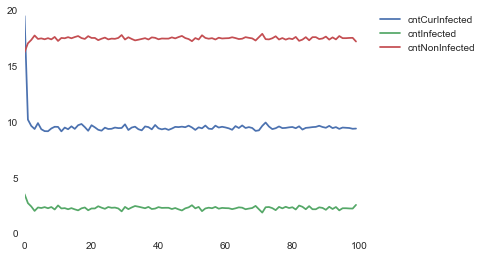

key =  25
    index  width  height  rateInh  rateVir  iterations cognitive  \
25   2600     10      10      0.2      0.1         100     False   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
25                 0.8                        0.2                20   

    lifetimeVir  
25          101  


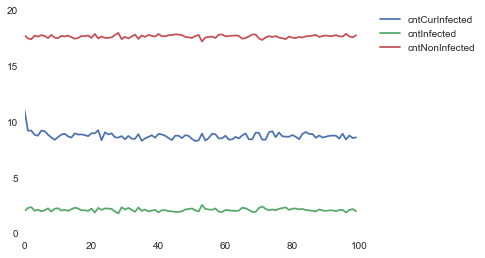

key =  26
    index  width  height  rateInh  rateVir  iterations cognitive  \
26   2700     10      10      0.2      0.1         100      True   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
26                 0.8                        0.2                20   

    lifetimeVir  
26          101  


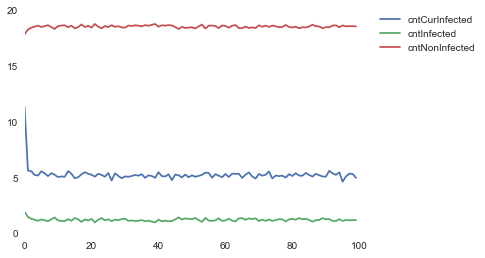

key =  27
    index  width  height  rateInh  rateVir  iterations cognitive  \
27   2800     10      10      0.2      0.1         100     False   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
27                   0                        0.2                20   

    lifetimeVir  
27          101  


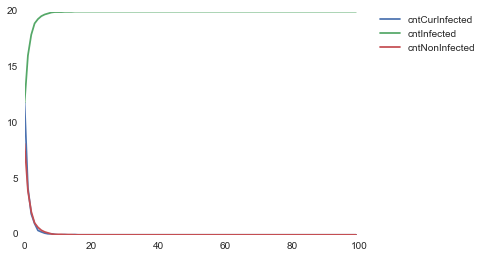

key =  28
    index  width  height  rateInh  rateVir  iterations cognitive  \
28   3000     10      10      0.1      0.1         100      True   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
28                 0.2                        0.2                10   

    lifetimeVir  
28          101  


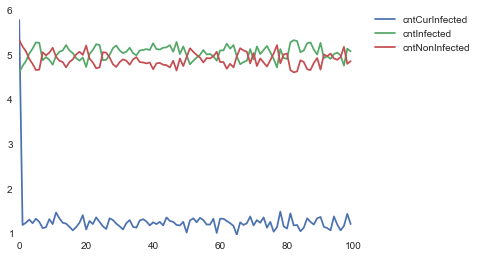

key =  29
    index  width  height  rateInh  rateVir  iterations cognitive  \
29   3300     10      10      0.2      0.1         100     False   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
29                 0.5                        0.5                20   

    lifetimeVir  
29            1  


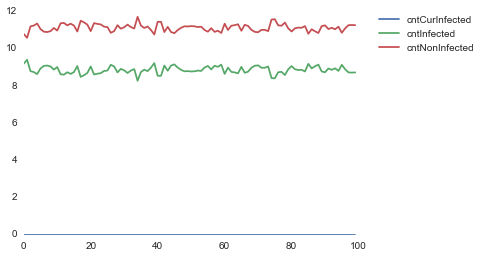

key =  30
    index  width  height  rateInh  rateVir  iterations cognitive  \
30   3400     10      10      0.2      0.1         100      True   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
30                 0.5                        0.5                20   

    lifetimeVir  
30            1  


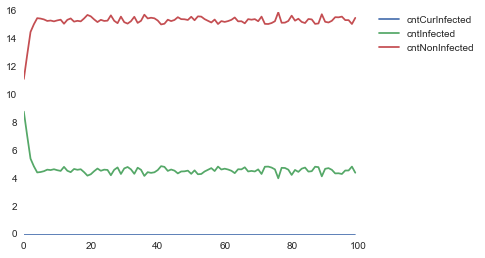

key =  31
    index  width  height  rateInh  rateVir  iterations cognitive  \
31   3500     10      10      0.2      0.1         100     False   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
31                 0.5                        0.5                20   

    lifetimeVir  
31          101  


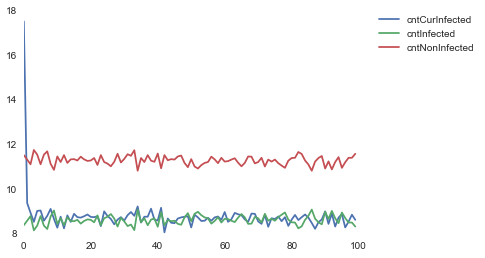

key =  32
    index  width  height  rateInh  rateVir  iterations cognitive  \
32   3600     10      10      0.2      0.1         100      True   

    recoveryRate / cnt  avgProbabilityOfInfection  NmbOfInhabitants  \
32                 0.5                        0.5                20   

    lifetimeVir  
32          101  


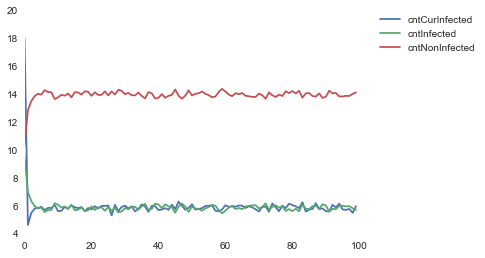

In [20]:
for key in data_stamp.keys():
    print "key = " ,key 
    print different_parameters[key:key+1]
    criterion = logs.Stamp.map(lambda x: x in data_stamp[key])
    df_logs_same_parameters = logs[criterion]
    agg_df = df_logs_same_parameters.groupby(by = "DataType").mean().reset_index()
    val = agg_df[agg_df.DataType == "cntInfected"].values.T[2:].T+  agg_df[agg_df.DataType == "cntNonInfected"].values.T[2:].T
    #plt.plot(val.T, label ="SUM")
    #plt.plot(agg_df[agg_df.DataType == "cntDeletedViruses"].T[2:], label = "cntDeletedViruses")
    #plt.plot(agg_df[agg_df.DataType == "cntLivingViruses"].T[2:] , label ="cntLivingViruses")
    plt.plot(agg_df[agg_df.DataType == "cntCurInfected"].T[2:], label = "cntCurInfected")
    #print agg_df[agg_df.DataType == "cntInfected"].T[2:]
    plt.plot(agg_df[agg_df.DataType == "cntInfected"].T[2:], label = "cntInfected")
    plt.plot(agg_df[agg_df.DataType == "cntNonInfected"].T[2:], label = "cntNonInfected")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

In [ ]:
# 14  ///0.1 0.05// 0.2 0.2 + cog

# Elapsed Time

In [26]:
agg_df = logs_main[(logs_main[u'recoveryRate / cnt'] == 0.2) & (logs_main[u'avgProbabilityOfInfection'] == 0.2) ].groupby(by =[u'width', u'height', u'rateInh', u'rateVir', u'iterations', u'cognitive', u'lifetimeVir', u'NmbOfInhabitants', u'recoveryRate / cnt', u'avgProbabilityOfInfection']).mean().reset_index()

In [27]:
agg_df

,width,height,rateInh,rateVir,iterations,cognitive,lifetimeVir,NmbOfInhabitants,recoveryRate / cnt,avgProbabilityOfInfection,timeStamp,elapsed time,durationOfDesease,nmbOfRelocationInfected,nmbOfRelocationNonInfected,nmbOfConflictsII,nmbOfConflictsINI,nmbOfConflictsININ,nmbOfViruses
0,10,10,0.1,0.05,100,False,1,10,0.2,0.2,2.016011e+14,334.180,548.830000,39.960,9.670,13.510000,21.700,8.820,5
1,10,10,0.1,0.05,100,False,101,10,0.2,0.2,2.016011e+14,696.670,526.610000,66.960,32.450,11.480000,20.880,9.930,5
2,10,10,0.1,0.05,100,True,1,10,0.2,0.2,2.016011e+14,688.440,40.350000,19.600,12.690,2.630000,14.020,11.440,5
3,10,10,0.1,0.05,100,True,101,10,0.2,0.2,2.016011e+14,1062.150,344.500000,181.270,185.150,24.900000,132.120,163.710,5
4,10,10,0.1,0.10,100,False,1,10,0.2,0.2,2.016011e+14,265.465,666.010000,43.355,5.400,19.275000,19.190,4.935,10
5,10,10,0.1,0.10,100,False,101,10,0.2,0.2,2.016011e+14,687.880,657.676667,120.190,39.490,18.953333,19.500,5.400,10
6,10,10,0.1,0.10,100,True,1,10,0.2,0.2,2.016011e+14,510.185,41.525000,19.175,6.155,3.150000,12.785,5.475,10
7,10,10,0.1,0.10,100,True,101,10,0.2,0.2,2.016011e+14,370.310,507.550000,324.230,147.430,67.610000,200.340,123.580,10
8,10,10,0.2,0.10,100,False,1,20,0.2,0.2,2.016011e+14,1173.580,1329.640000,199.920,24.830,82.580000,82.700,20.990,10
9,10,10,0.2,0.10,100,False,101,20,0.2,0.2,2.016011e+14,1296.460,1305.020000,374.510,100.770,79.450000,86.240,23.230,10


In [28]:
agg_df = agg_df[(agg_df.rateInh !=0.1) | (agg_df.rateVir !=0.1)].reset_index()

In [29]:
l1 = (agg_df.rateInh)
l2 = (agg_df.rateVir)
l = []
for it in xrange(len(l1)):
    l.append("inh = " + str(l1[it ])+ "; vir ="+str(l2[it]))

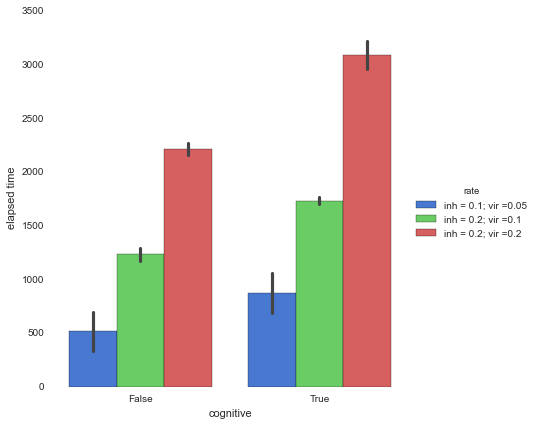

In [49]:
agg_df["rate"] = pd.Series(data = l, index=agg_df.index)
g = sns.factorplot(x="cognitive", y=" elapsed time", hue="rate", data=agg_df, size=6, kind="bar", palette="muted")
g.despine(left=True)
#g.set_ylabels("survival probability")

# Lifetime - is there benefit of cognitive moving?

In [15]:
criterion = (logs_main.rateInh == 0.2) & (logs_main.rateVir == 0.1) & (logs_main[u'recoveryRate / cnt'] == 0.2) & (logs_main.avgProbabilityOfInfection == 0.2)

In [16]:
logs["mean"] = pd.Series(logs[logs.columns[2:]].apply(np.mean, axis = 1), index = logs.index)
merged_logs_inner = pd.merge(left=logs,right=logs_main, left_on='Stamp', right_on='timeStamp')
merged_logs_inner_avg = merged_logs_inner.groupby(by =[u'width', u'height', u'rateInh', u'rateVir', u'iterations', u'cognitive', u'lifetimeVir', u'NmbOfInhabitants','DataType']).mean().reset_index()

In [17]:
criterion = (merged_logs_inner_avg.rateInh == 0.2) & (merged_logs_inner.rateVir == 0.1) & (merged_logs_inner[u'recoveryRate / cnt'] == 0.2) & (merged_logs_inner.avgProbabilityOfInfection == 0.2) & (merged_logs_inner.cognitive)
#g = sns.factorplot(x="lifetimeVir", y="mean", hue="DataType", data=merged_logs_inner[criterion], size=6, kind="bar", palette="muted")
#g.despine(left=True)

criterion1 = (merged_logs_inner.rateInh == 0.2) & (merged_logs_inner.rateVir == 0.1) & (merged_logs_inner[u'recoveryRate / cnt'] == 0.2) & (merged_logs_inner.avgProbabilityOfInfection == 0.2) & (merged_logs_inner.cognitive == False)
#g = sns.factorplot(x="lifetimeVir", y="mean", hue="DataType", data=merged_logs_inner[criterion1], size=6, kind="bar", palette="muted")
#g.despine(left=True)

In [18]:
criterion = (merged_logs_inner_avg.rateInh == 0.2) & (merged_logs_inner_avg.rateVir == 0.1) & (merged_logs_inner_avg[u'recoveryRate / cnt'] == 0.2) & (merged_logs_inner_avg.avgProbabilityOfInfection == 0.2) & (merged_logs_inner_avg.cognitive)

criterion1 = criterion1 = (merged_logs_inner_avg.rateInh == 0.2) & (merged_logs_inner_avg.rateVir == 0.1) & (merged_logs_inner_avg[u'recoveryRate / cnt'] == 0.2) & (merged_logs_inner_avg.avgProbabilityOfInfection == 0.2) & (merged_logs_inner_avg.cognitive == False)

In [19]:
df_cognitive = merged_logs_inner_avg[merged_logs_inner_avg.cognitive]
df_not_cognitive = merged_logs_inner_avg[merged_logs_inner_avg.cognitive == False]

In [20]:
writer = pd.ExcelWriter('cog_notcog.xlsx')
df_cognitive.to_excel(writer,'cog')
df_not_cognitive.to_excel(writer,'notcog')
writer.save()

# Rate of susceptible and infected inhabitants

In [21]:
cols = [u'DataType', u'width', u'height', u'rateInh', u'rateVir', u'iterations', u'lifetimeVir']
other_cols = [u'timeStamp', u' elapsed time', u'cognitive',
              u'NmbOfInhabitants', u'durationOfDesease', u'nmbOfRelocationInfected', u'nmbOfRelocationNonInfected', 
              u'nmbOfConflictsII', u'nmbOfConflictsINI', u'nmbOfConflictsININ', 
              u'recoveryRate / cnt', u'nmbOfViruses', u'avgProbabilityOfInfection']
all_cols = cols + other_cols

def get_value(df1, df2, columns_name, all_cols, col_name, new_col_name1, new_col_name2):
    columns_name.append(col_name)
    lst = []
    print columns_name
    df_1 = group_by_columns(df1, columns_name)[columns_name]
    df_2 = group_by_columns(df2, columns_name)[columns_name]
    zeros_val = np.zeros((1, len(columns_name) + 2))
    new_cols = columns_name + [ new_col_name1, new_col_name2]
    new_df = pd.DataFrame(zeros_val, columns=new_cols)
    for i in xrange(df_1.shape[0]):
        row1 = df_1[columns_name].irow(i)
        run = True
        j = 0
        while (run) and (j < df_2.shape[0]):
            row2 = df_2[columns_name].irow(j)
            if (row1.width == row2.width) and  (row1.height == row2.height) and (row1.rateInh == row2.rateInh) and (row1.rateVir == row2.rateVir) and (row1.iterations == row2.iterations) and (row1.lifetimeVir == row2.lifetimeVir) and (row1.DataType == row2.DataType):
                new_list = list(row1.values)
                new_list.extend([df_1.irow(i)[col_name], df_2.irow(j)[col_name]])
                df_temp = pd.DataFrame(new_list, new_cols).T
                new_df = pd.concat([new_df, df_temp])
                run = False
            else:
                j = j + 1
    return new_df



In [22]:
res = get_value(df_cognitive, df_not_cognitive, cols, all_cols,'mean', 'cog_mean', 'not_cog_mean')

[u'DataType', u'width', u'height', u'rateInh', u'rateVir', u'iterations', u'lifetimeVir', 'mean']


In [40]:
res['nmb_cog']=res.cog_mean.astype(float)/res.rateInh.astype(float)
res['nmb_noncog']=res.not_cog_mean.astype(float)/res.rateInh.astype(float)

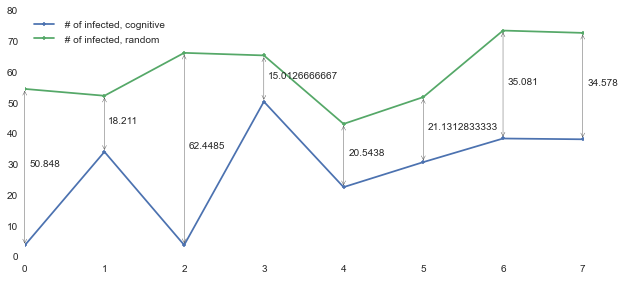

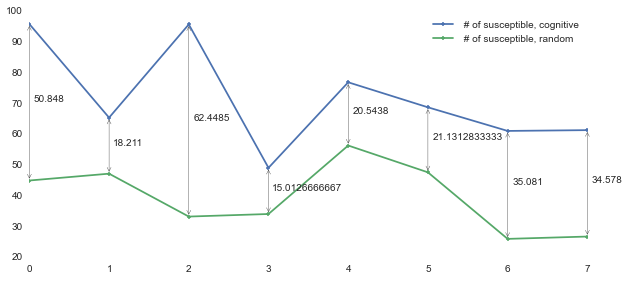

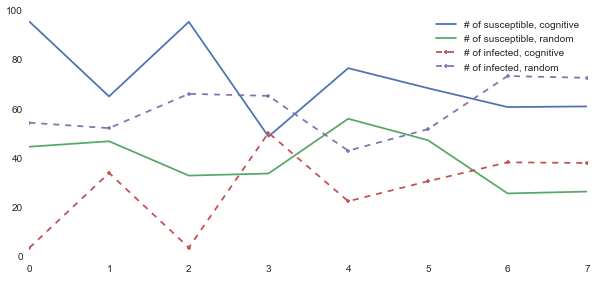

In [42]:
val_cog_inf = list(res[res.DataType == "cntInfected"].nmb_cog)
val_not_cog_inf = list(res[res.DataType == "cntInfected"].nmb_noncog)

val_cog_nonInf = list(res[res.DataType == "cntNonInfected"].nmb_cog)
val_not_cog_nonInf = list(res[res.DataType == "cntNonInfected"].nmb_noncog)

fig = plt.figure(1, figsize=(10, 15))
ax = fig.add_subplot(311, autoscale_on=True)

x_coords = range(len(val_not_cog_inf))
ax.plot(val_cog_inf,'.-', label = " # of infected, cognitive")
ax.plot(val_not_cog_inf, '.-', label = " # of infected, random")
ax.legend(loc = 0)
for i in xrange(len(val_not_cog_inf)):
    dif = abs(val_cog_inf[i] - val_not_cog_inf[i])
    plt.annotate('', xy=(i, val_cog_inf[i]), xycoords='data',xytext=(i, val_not_cog_inf[i]), textcoords='data', 
                 arrowprops={'arrowstyle': '<->'})
    plt.annotate(
        dif, xy=(i, max(val_cog_inf[i], val_not_cog_inf[i]) - dif/2), xycoords='data',
        xytext=(5, 0), textcoords='offset points')    
    
    
fig = plt.figure(2, figsize=(10, 15))
ax = fig.add_subplot(312, autoscale_on=True)

x_coords = range(len(val_cog_nonInf))
ax.plot(val_cog_nonInf,'.-', label = " # of susceptible, cognitive")
ax.plot(val_not_cog_nonInf, '.-',label = " # of susceptible, random")
ax.legend(loc = 0)
for i in xrange(len(val_cog_nonInf)):
    dif = abs(val_cog_nonInf[i] - val_not_cog_nonInf[i])
    plt.annotate('', xy=(i, val_cog_nonInf[i]), xycoords='data',xytext=(i, val_not_cog_nonInf[i]), textcoords='data', 
                 arrowprops={'arrowstyle': '<->'})
    plt.annotate(dif, xy=(i, max(val_cog_nonInf[i], val_not_cog_nonInf[i]) - dif/2), xycoords='data',
    xytext=(5, 0), textcoords='offset points')

fig = plt.figure(3, figsize=(10, 15))
ax = fig.add_subplot(313, autoscale_on=True)
ax.plot(val_cog_nonInf, label = "# of susceptible, cognitive")
ax.plot(val_not_cog_nonInf, label = "# of susceptible, random")
ax.plot(val_cog_inf,'.--',label = "# of infected, cognitive")
ax.plot(val_not_cog_inf, '.--', label = "# of infected, random")  
ax.legend(loc = 0)

In [40]:
annotation = res[res.DataType == "cntInfected"][[u'rateInh', u'rateVir', u'lifetimeVir']].reset_index()

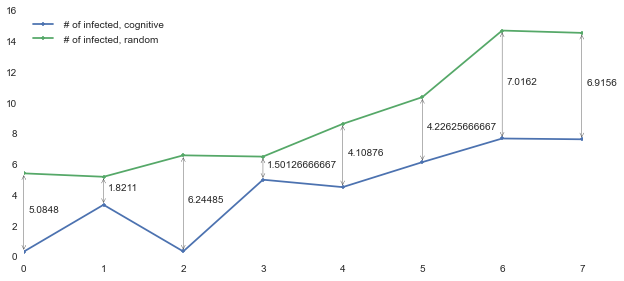

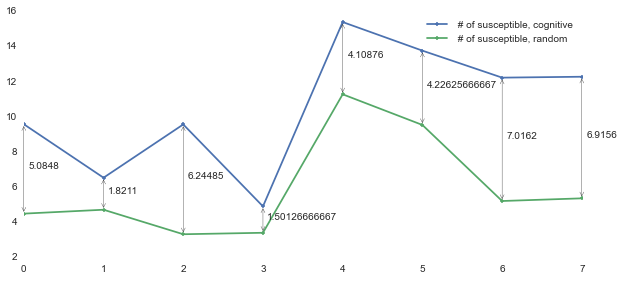

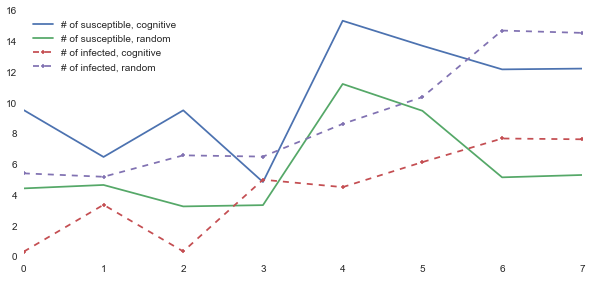

In [42]:
val_cog_inf = list(res[res.DataType == "cntInfected"].cog_mean)
val_not_cog_inf = list(res[res.DataType == "cntInfected"].not_cog_mean)

val_cog_nonInf = list(res[res.DataType == "cntNonInfected"].cog_mean)
val_not_cog_nonInf = list(res[res.DataType == "cntNonInfected"].not_cog_mean)

fig = plt.figure(1, figsize=(10, 15))
ax = fig.add_subplot(311, autoscale_on=True)

x_coords = range(len(val_not_cog_inf))
ax.plot(val_cog_inf,'.-', label = " # of infected, cognitive")
ax.plot(val_not_cog_inf, '.-', label = " # of infected, random")
ax.legend(loc = 0)
for i in xrange(len(val_not_cog_inf)):
    dif = abs(val_cog_inf[i] - val_not_cog_inf[i])
    plt.annotate('', xy=(i, val_cog_inf[i]), xycoords='data',xytext=(i, val_not_cog_inf[i]), textcoords='data', 
                 arrowprops={'arrowstyle': '<->'})
    plt.annotate(
        dif, xy=(i, max(val_cog_inf[i], val_not_cog_inf[i]) - dif/2), xycoords='data',
        xytext=(5, 0), textcoords='offset points')    
    
    
fig = plt.figure(2, figsize=(10, 15))
ax = fig.add_subplot(312, autoscale_on=True)

x_coords = range(len(val_cog_nonInf))
ax.plot(val_cog_nonInf,'.-', label = " # of susceptible, cognitive")
ax.plot(val_not_cog_nonInf, '.-',label = " # of susceptible, random")
ax.legend(loc = 0)
for i in xrange(len(val_cog_nonInf)):
    dif = abs(val_cog_nonInf[i] - val_not_cog_nonInf[i])
    plt.annotate('', xy=(i, val_cog_nonInf[i]), xycoords='data',xytext=(i, val_not_cog_nonInf[i]), textcoords='data', 
                 arrowprops={'arrowstyle': '<->'})
    plt.annotate(dif, xy=(i, max(val_cog_nonInf[i], val_not_cog_nonInf[i]) - dif/2), xycoords='data',
    xytext=(5, 0), textcoords='offset points')

fig = plt.figure(3, figsize=(10, 15))
ax = fig.add_subplot(313, autoscale_on=True)
ax.plot(val_cog_nonInf, label = "# of susceptible, cognitive")
ax.plot(val_not_cog_nonInf, label = "# of susceptible, random")
ax.plot(val_cog_inf,'.--',label = "# of infected, cognitive")
ax.plot(val_not_cog_inf, '.--', label = "# of infected, random")  
ax.legend(loc = 0)

In [81]:
res[res.DataType == "cntInfected"].to_csv("dif_param.csv")

In [82]:
cols = [u'DataType', u'width', u'height', u'rateInh', u'rateVir', u'iterations', u'lifetimeVir']
cr1 = df_cognitive.DataType == "cntCurInfected"
cr2 = df_not_cognitive.DataType == "cntCurInfected"
res_nmbOfRelocationNonInfected = get_value(df_cognitive[cr1], df_not_cognitive[cr2], cols, all_cols,u'nmbOfRelocationNonInfected',
                                           'cog_mean', 'not_cog_mean')
del res_nmbOfRelocationNonInfected['DataType']


cols = [u'DataType', u'width', u'height', u'rateInh', u'rateVir', u'iterations', u'lifetimeVir']
res_nmbOfRelocationInfected = get_value(df_cognitive[cr1], df_not_cognitive[cr2], cols, all_cols,u'nmbOfRelocationInfected', 'cog_mean', 'not_cog_mean')
del res_nmbOfRelocationInfected['DataType']

[u'DataType', u'width', u'height', u'rateInh', u'rateVir', u'iterations', u'lifetimeVir', u'nmbOfRelocationNonInfected']
[u'DataType', u'width', u'height', u'rateInh', u'rateVir', u'iterations', u'lifetimeVir', u'nmbOfRelocationInfected']


In [83]:
res_nmbOfRelocationInfected

,width,height,rateInh,rateVir,iterations,lifetimeVir,nmbOfRelocationInfected,cog_mean,not_cog_mean
0,0,0,0,0,0,0,0,0,0
0,10,10,0.1,0.05,100,1,19.6,19.6,39.96
0,10,10,0.1,0.05,100,101,181.27,181.27,66.96
0,10,10,0.1,0.1,100,1,18.33,18.33,43.67
0,10,10,0.2,0.1,100,1,652.5175,652.5175,135.1125
0,10,10,0.2,0.1,100,101,598.17,598.17,292.562
0,10,10,0.2,0.2,100,1,1113.41,1113.41,208.52
0,10,10,0.2,0.2,100,101,1380.1,1380.1,642.26


In [55]:
def get_row(df):
    return df[(((df['rateInh'] == 0.1) & (df['rateVir'] == 0.05)) | ((df['rateInh'] == 0.2) & (df['rateVir'] == 0.1)) | ((df['rateInh'] == 0.2) & (df['rateVir'] == 0.2)))& (df["lifetimeVir"] == 101)]

In [57]:
ni_relocation = get_row(res_nmbOfRelocationNonInfected)

In [58]:
i_relocation = get_row(res_nmbOfRelocationInfected)

([<matplotlib.axis.XTick at 0x1bf6a588>,
 <a list of 3 Text xticklabel objects>)

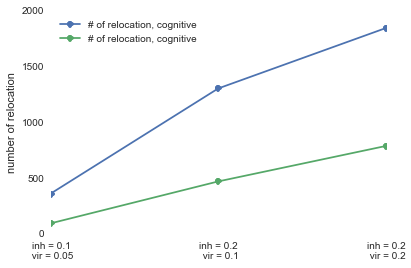

In [74]:
labels = ['inh = 0.1\n vir = 0.05', 'inh = 0.2\n vir = 0.1', 'inh = 0.2\n vir = 0.2']
x = [0, 1, 2]
plt.plot(x, ni_relocation.cog_mean + i_relocation.cog_mean, 'o-', label = '# of relocation, cognitive')
plt.plot(x, ni_relocation.not_cog_mean+ i_relocation.not_cog_mean, 'o-', label = '# of relocation, cognitive')
plt.ylabel("number of relocation")
plt.legend(loc = 0)
plt.xticks(x, labels, rotation='horizontal')

# Duration of the desease

In [43]:
logs_main.columns

Index([u'timeStamp', u' elapsed time', u'width', u'height', u'rateInh', u'rateVir', u'iterations', u'cognitive', u'lifetimeVir', u'NmbOfInhabitants', u'durationOfDesease', u'nmbOfRelocationInfected', u'nmbOfRelocationNonInfected', u'nmbOfConflictsII', u'nmbOfConflictsINI', u'nmbOfConflictsININ', u'recoveryRate / cnt', u'nmbOfViruses', u'avgProbabilityOfInfection', u'deseasDurationByOne'], dtype='object')

In [44]:
summary = logs_main.groupby(by = [u'width', u'height', u'rateInh', u'rateVir', u'iterations', u'cognitive',
                        u'lifetimeVir', u'NmbOfInhabitants', u'recoveryRate / cnt',  u'avgProbabilityOfInfection']).agg('mean').reset_index()

In [51]:
duration = summary.sort(['deseasDurationByOne'], ascending=[1])[[u'rateInh', u'rateVir', u'cognitive', u'lifetimeVir',
                                                      u'recoveryRate / cnt',  u'avgProbabilityOfInfection', u'deseasDurationByOne']]
duration.to_csv("duration.csv")

In [80]:
res = summary[[ u'rateInh', u'rateVir', u'cognitive',
                        u'lifetimeVir', u'NmbOfInhabitants', u'recoveryRate / cnt',  u'avgProbabilityOfInfection', 'deseasDurationByOne']]

In [82]:
res[res.lifetimeVir == 101]

,rateInh,rateVir,cognitive,lifetimeVir,NmbOfInhabitants,recoveryRate / cnt,avgProbabilityOfInfection,deseasDurationByOne
1,0.1,0.05,False,101,10,0.2,0.2,52.661000
3,0.1,0.05,True,101,10,0.2,0.2,34.450000
5,0.1,0.10,False,101,10,0.2,0.2,65.767667
7,0.1,0.10,True,101,10,0.2,0.2,50.755000
13,0.2,0.10,False,101,20,0.0,0.2,99.150000
14,0.2,0.10,False,101,20,0.2,0.2,65.251000
15,0.2,0.10,False,101,20,0.2,0.8,76.715500
16,0.2,0.10,False,101,20,0.5,0.5,43.333000
17,0.2,0.10,False,101,20,0.8,0.2,11.169000
18,0.2,0.10,False,101,20,0.8,0.8,17.741000


In [84]:
cols = [u'DataType', u'width', u'height', u'rateInh', u'rateVir', u'iterations', u'lifetimeVir',u'NmbOfInhabitants']
cr1 = df_cognitive.DataType == "cntCurInfected"
cr2 = df_not_cognitive.DataType == "cntCurInfected"
res_nmbOfConflictsII = get_value(df_cognitive[cr1], df_not_cognitive[cr2], cols, all_cols,'nmbOfConflictsII','cog_mean', 'not_cog_mean')
del res_nmbOfConflictsII['DataType']
res_nmbOfConflictsII = res_nmbOfConflictsII.ix[1:]


cols = [u'DataType', u'width', u'height', u'rateInh', u'rateVir', u'iterations', u'lifetimeVir']
res_nmbOfConflictsINI = get_value(df_cognitive[cr1], df_not_cognitive[cr2], cols, all_cols,'nmbOfConflictsINI', 'cog_mean', 'not_cog_mean')
del res_nmbOfConflictsINI['DataType']
res_nmbOfConflictsINI = res_nmbOfConflictsINI.ix[1:]



cols = [u'DataType', u'width', u'height', u'rateInh', u'rateVir', u'iterations', u'lifetimeVir']
res_nmbOfConflictsININ = get_value(df_cognitive[cr1], df_not_cognitive[cr2], cols, all_cols,'nmbOfConflictsININ', 'cog_mean', 'not_cog_mean')
del res_nmbOfConflictsININ['DataType']
res_nmbOfConflictsININ = res_nmbOfConflictsININ.ix[1:]

[u'DataType', u'width', u'height', u'rateInh', u'rateVir', u'iterations', u'lifetimeVir', u'NmbOfInhabitants', 'nmbOfConflictsII']
[u'DataType', u'width', u'height', u'rateInh', u'rateVir', u'iterations', u'lifetimeVir', 'nmbOfConflictsINI']
[u'DataType', u'width', u'height', u'rateInh', u'rateVir', u'iterations', u'lifetimeVir', 'nmbOfConflictsININ']


In [239]:
res_nmbOfConflictsII

,width,height,rateInh,rateVir,iterations,lifetimeVir,NmbOfInhabitants,nmbOfConflictsII,cog_mean,not_cog_mean
0,10,10,0.1,0.05,100,1,10,2.63,2.63,13.51
0,10,10,0.1,0.05,100,101,10,24.9,24.9,11.48
0,10,10,0.1,0.1,100,1,10,3.29,3.29,19.1
0,10,10,0.2,0.1,100,1,20,101.4375,101.4375,50.635
0,10,10,0.2,0.1,100,101,20,124.8525,124.8525,76.704
0,10,10,0.2,0.2,100,1,20,207.18,207.18,101.58
0,10,10,0.2,0.2,100,101,20,201.39,201.39,104


In [240]:
res_nmbOfConflictsINI

,width,height,rateInh,rateVir,iterations,lifetimeVir,nmbOfConflictsINI,cog_mean,not_cog_mean
0,10,10,0.1,0.05,100,1,14.02,14.02,21.7
0,10,10,0.1,0.05,100,101,132.12,132.12,20.88
0,10,10,0.1,0.1,100,1,12.05,12.05,19.44
0,10,10,0.2,0.1,100,1,384.6125,384.6125,60.5525
0,10,10,0.2,0.1,100,101,323.5275,323.5275,49.844
0,10,10,0.2,0.2,100,1,622.065,622.065,70.59
0,10,10,0.2,0.2,100,101,603.84,603.84,73.78


In [241]:
res_nmbOfConflictsININ

,width,height,rateInh,rateVir,iterations,lifetimeVir,nmbOfConflictsININ,cog_mean,not_cog_mean
0,10,10,0.1,0.05,100,1,11.44,11.44,8.82
0,10,10,0.1,0.05,100,101,163.71,163.71,9.93
0,10,10,0.1,0.1,100,1,5.61,5.61,4.75
0,10,10,0.2,0.1,100,1,642.1775,642.1775,75.1325
0,10,10,0.2,0.1,100,101,548.45,548.45,61.93
0,10,10,0.2,0.2,100,1,291.12,291.12,12.85
0,10,10,0.2,0.2,100,101,289.38,289.38,13.68


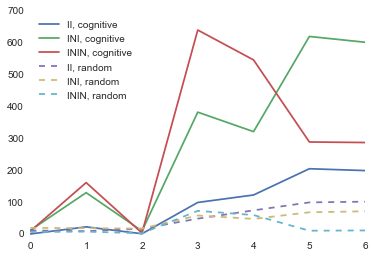

In [256]:
plt.plot(res_nmbOfConflictsII.cog_mean, label = "II, cognitive")
plt.plot(res_nmbOfConflictsINI.cog_mean, label = "INI, cognitive")
plt.plot(res_nmbOfConflictsININ.cog_mean, label = "ININ, cognitive")
plt.plot(res_nmbOfConflictsII.not_cog_mean, '--', label = "II, random")
plt.plot(res_nmbOfConflictsINI.not_cog_mean, '--',label = "INI, random")
plt.plot(res_nmbOfConflictsININ.not_cog_mean,'--', label = "ININ, random")
plt.legend(loc = 0)